# Simple Regression

Configure the project. Indeed you create a dataset in csv format.

In [1]:
! rm -rf *.csv
! unzip ./dataset/archive.zip
! head -n 1 *.csv | head -n 2 | tail -n 1 > data.csv && for file in *.csv; do (tail -n +2 "$file"; echo) >> data.csv; done && sed -i '/^$/d' data.csv

Archive:  ./dataset/archive.zip
  inflating: score.csv               
  inflating: score_updated.csv       


Import needed libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [3]:
df = pd.read_csv("data.csv")
df.head()
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head()

,Hours,Scores
0,7.4,69
1,3.8,35
2,3.5,30
3,1.6,19
4,5.1,47


In [4]:
# summarize data
df.describe() 

,Hours,Scores
count,121.000000,121.000000
mean,5.214876,53.495868
std,2.499189,24.988705
min,1.000000,12.000000
25%,3.000000,30.000000
50%,5.100000,54.000000
75%,7.400000,75.000000
max,9.800000,99.000000


Print the histogram chart of data

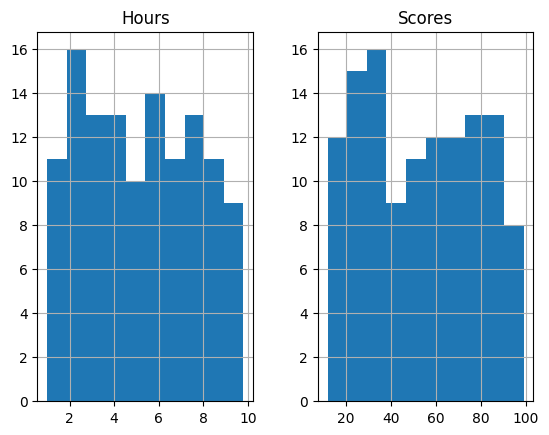

In [5]:
viz = df[["Hours", "Scores"]]
viz.hist()
plt.show()

Print scatter chart of data to recognize the patterns of data. Based on the below chart we must answer to this question "Is Linear Simple Regression good or not?"

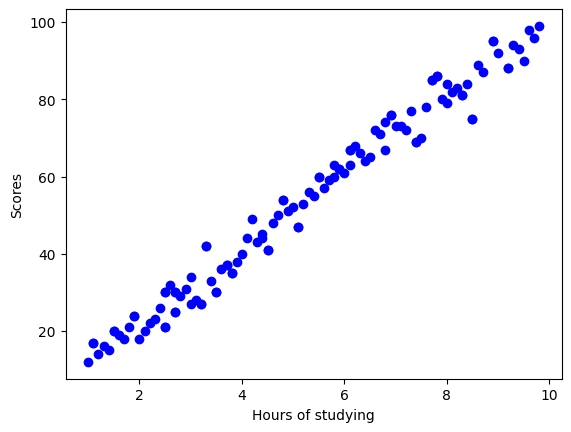

In [6]:
plt.scatter(df.Hours, df.Scores, color="blue")
plt.ylabel("Scores")
plt.xlabel("Hours of studying")
plt.show()

In [7]:
# print(df)
train, test = train_test_split(df, test_size=0.20, random_state=42)
# test, evaluate = train_test_split(test, test_size=0.5, random_state=42)

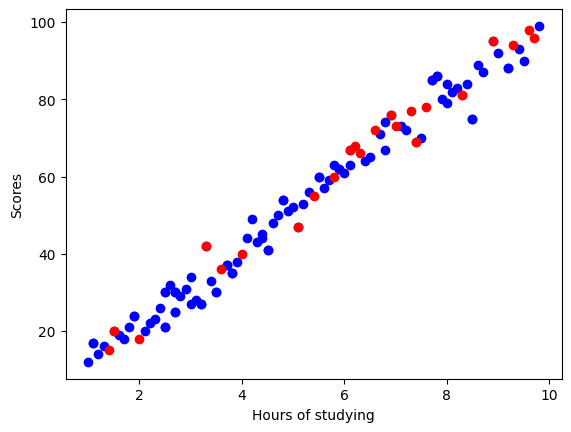

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(train.Hours, train.Scores, color="blue")
ax1.scatter(test.Hours, test.Scores, color="red")
plt.ylabel("Scores")
plt.xlabel("Hours of studying")
plt.show()

Find the best fitted line based on distribution of data. 

In [9]:
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
reg.fit(train_x, train_y)

print("Coefficients:\t", reg.coef_)
print("Intercept:\t", reg.intercept_)

Coefficients:	 [[9.86089296]]
Intercept:	 [1.93973905]


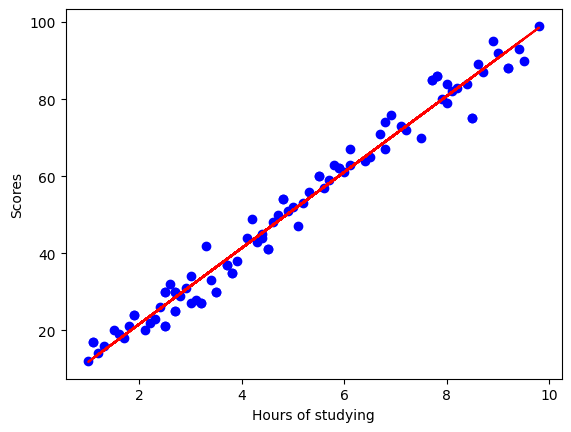

In [10]:
plt.scatter(train.Hours, train.Scores, color="blue")
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], "-r")
#               y = theta1 x + theta0
plt.ylabel("Scores")
plt.xlabel("Hours of studying")
plt.show()

Testing model based on Test data. Measure the R2 and MSE.

In [11]:
test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])

test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 3.17
Residual sum of squares (MSE): 14.37
R2-score: 0.97
